In [1]:
# Import the libraries
import numpy as np
import pandas as pd
# Load the Data
X = pd.read_csv(r'C:\Data\DeepLearningWorkshop\aps_failure_training_feats.csv')
y = pd.read_csv(r'C:\Data\DeepLearningWorkshop\aps_failure_training_target.csv')



In [2]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.20, random_state=seed)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Transform the training data
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X_test.columns)
# Transform the testing data
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X_train.columns)

In [4]:
# Import the relevant Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import random
np.random.seed(seed)
random.set_seed(seed)
model = Sequential()
# Add the hidden dense layers with dropout Layer
model.add(Dense(units=64, activation='relu', \
                kernel_initializer='uniform', \
                input_dim=X_train.shape[1]))
model.add(Dropout(rate=0.5))
model.add(Dense(units=32, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=16, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=8, activation='relu', \
          kernel_initializer='uniform'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=4, activation='relu', \
                kernel_initializer='uniform'))
model.add(Dropout(rate=0.1))
# Add Output Dense Layer
model.add(Dense(units=1, activation='sigmoid', \
                kernel_initializer='uniform'))
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', \
              metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
model.fit(X_train, y_train, epochs=100, batch_size=20, \
          verbose=1, validation_split=0.2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 3s 75us/step - loss: 0.0810 - accuracy: 0.9833 - val_loss: 0.0347 - val_accuracy: 0.9842
Epoch 2/100
38400/38400 [==============================] - 3s 76us/step - loss: 0.0417 - accuracy: 0.9834 - val_loss: 0.0325 - val_accuracy: 0.9842
Epoch 3/100
38400/38400 [==============================] - 3s 75us/step - loss: 0.0382 - accuracy: 0.9834 - val_loss: 0.0336 - val_accuracy: 0.9842
Epoch 4/100
38400/38400 [==============================] - 3s 75us/step - loss: 0.0342 - accuracy: 0.9834 - val_loss: 0.0319 - val_accuracy: 0.9842
Epoch 5/100
38400/38400 [==============================] - 3s 76us/step - loss: 0.0357 - accuracy: 0.9870 - val_loss: 0.0297 - val_accuracy: 0.9905
Epoch 6/100
38400/38400 [==============================] - 3s 76us/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 7/100
38400/38400 [==============================] - 3s 7

Epoch 56/100
38400/38400 [==============================] - 3s 86us/step - loss: 0.0211 - accuracy: 0.9943 - val_loss: 0.0429 - val_accuracy: 0.9924
Epoch 57/100
38400/38400 [==============================] - 3s 84us/step - loss: 0.0227 - accuracy: 0.9938 - val_loss: 0.0415 - val_accuracy: 0.9929
Epoch 58/100
38400/38400 [==============================] - 4s 103us/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.0474 - val_accuracy: 0.9926
Epoch 59/100
38400/38400 [==============================] - 4s 102us/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.0409 - val_accuracy: 0.9916
Epoch 60/100
38400/38400 [==============================] - 3s 72us/step - loss: 0.0246 - accuracy: 0.9939 - val_loss: 0.0420 - val_accuracy: 0.9922
Epoch 61/100
38400/38400 [==============================] - 3s 84us/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0418 - val_accuracy: 0.9924
Epoch 62/100
38400/38400 [==============================] - 3s 78us/step - loss: 0.0229 - accuracy: 0.99

In [6]:
y_pred_prob = model.predict_proba(X_test)

In [7]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

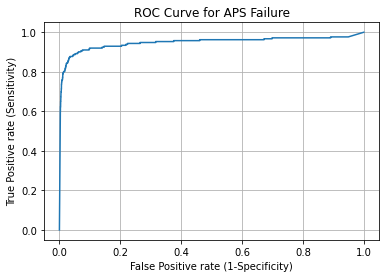

In [8]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title("ROC Curve for APS Failure")
plt.xlabel("False Positive rate (1-Specificity)")
plt.ylabel("True Positive rate (Sensitivity)")
plt.grid(True)
plt.show()

In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.9483719052314155